# Lecture 9

## Exercise 9.1: Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities: the salesman, starting from the hometown, must visit each city only one time and return to the hometown, chosing the trip with minimum length. If each city occupies the position $\vec{r_i}=(x_i,y_i)$ on a plane, the length of the path in $L_2$ norm is:
$$L_2[\vec{r}]=\sum_{i=1}^N \sqrt{(\vec{r_i}-\vec{r_{i+1}})^2}$$
with $\vec{r_N}=\vec{r_1}$. Therefore one must find the permutation $P^*$ of the $N$ cities which minimizes $L_2[\vec{r}]$.

We solve the problem with a genetic algorithm: we create a population of $N_{pop}=200$ possible paths of $N=32$ cities and let it evolves for 2000 generations. We also implement some mutation operators.

### classes

<font face="Courier">individual</font>: contains an <font face="Courier">int</font>, the number of cities, a <font face="Courier">double</font>, the norm of the path, two vectors of <font face="Courier">double</font>, the positions of each city, and a vector of <font face="Courier">int</font>, the path. It also contains the operators causing mutations on one path.

<font face="Courier">population</font>: contains three a <font face="Courier">int</font>, respectively the number of paths per generation, the number of cities per path and the current generation, five <font face="Courier">double</font>, the mutation rates, two vectors of <font face="Courier">double</font>, the position od each city, a vector of <font face="Courier">individual</font>, the current population, and the random number generator. It also contains the operators to generate a random individual, select the ones to reproduce and causing corssovers.

### operators

<font face="Courier">individual::permutation</font>: takes two positions in the path and swaps the corresponding cities; <br>
<font face="Courier">individual::block_permutation</font>: takes two positions and the length of the blocks and swaps their content; <br>
<font face="Courier">individual::shift</font>: takes the starting position and the length of the blocks, works as <font face="Courier">block_permutation</font> but with contiguus blocks; <br>
<font face="Courier">individual::inversion</font>: takes the starting and the ending positions and rotates the path.

<font face="Courier">population::select</font>: we sort the path for increasing length, generate a random number $r\in[0,1)$ and take the $j^{th}$, with $j=N_{pop}r^2$; <br>
<font face="Courier">population::first_gen</font>: generates the starting population using <font face="Courier">random_path</font>; <br>
<font face="Courier">population::random_path</font>: generates a vector of <font face="Courier">int</font> and makes some permutations on it; <br>
<font face="Courier">population::crossover</font>: using <font face="Courier">select</font>, choses two paths, cuts them at the same point, conserves their first part and completes them with the cities of their consort in the same order they appear; <br>
<font face="Courier">population::muatation</font>: for each of the four invdividual mutations, generates a random <font face="Courier">int k</font>, which is the maximum number of mutations of that type will occur in the current generation, then generates a random number $r\in[0,1)$ and, if it's smaller than the corresponding mutation rate, causes that mutation on a random individual; the last two steps are repeated k times; <br>
<font face="Courier">population::next_gen</font>: the next generation is created by chosing with <font face="Courier">select</font> the same number of individuals of the current one, making some corssovers (using the same criterion of <font face="Courier">mutation</font>) and causing some mutations; it also sorts the path before and after the process.

The mutation rates are: $0,1$ for permutations, $0,07$ for block permutations, $0,05$ for shifts and inversions and $0,65$ for crossovers. For each generation, we can have at most $N_{pop}$ permutations, $N_{pop}/2$ block permutations, $N_{pop}/5$ shifts, inversions and crossovers.

We place the cities on a circumference of radius $r=1$ and inside a square of side $l=2$. The average length is calculated with the best half of the population.

### cities on a circumference

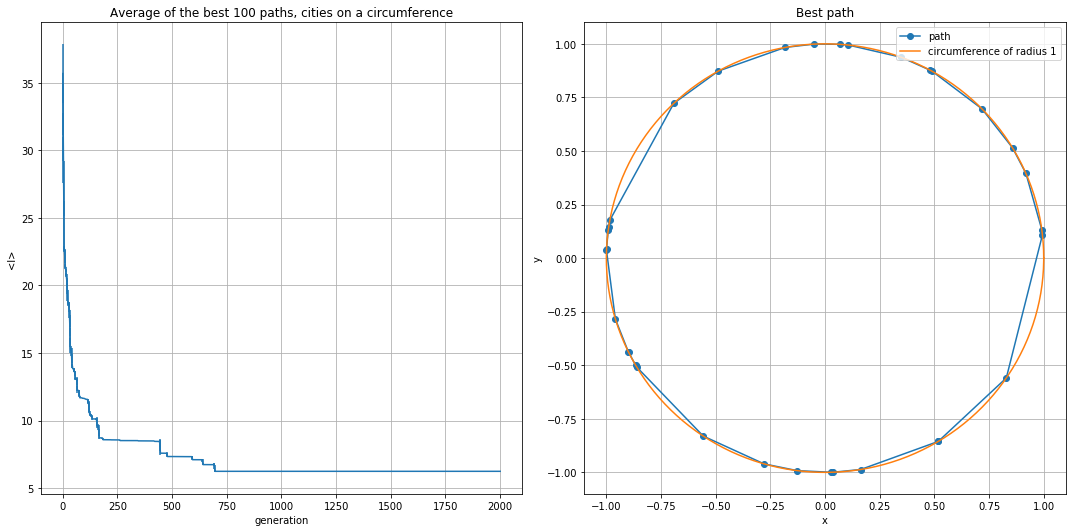

In [1]:
import numpy as np
import matplotlib.pyplot as plt

c_gen,c_ave,c_err=np.loadtxt("es9.1/TSP_L2_cir_ave.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
c_x,c_y=np.loadtxt("es9.1/TSP_L2_cir_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(15,7.5))

plt.subplot(121)
plt.errorbar(c_gen,c_ave,yerr=c_err)
plt.title("Average of the best 100 paths, cities on a circumference")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='path')
plt.plot(x,y,label='circumference of radius 1')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()

### cities inside a square

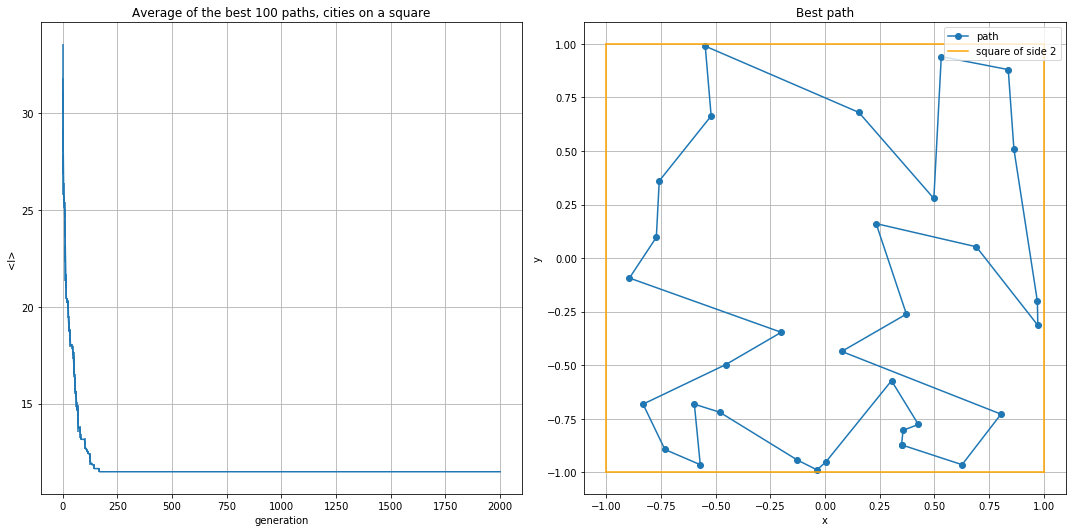

In [2]:
s_gen,s_ave,s_err=np.loadtxt("es9.1/TSP_L2_sq_ave.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
s_x,s_y=np.loadtxt("es9.1/TSP_L2_sq_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(15,7.5))

plt.subplot(121)
plt.errorbar(s_gen,s_ave,yerr=s_err)
plt.title("Average of the best 100 paths, cities on a square")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
plt.plot(s_x,s_y,'-o',label='path')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='orange',label='square of side 2')
plt.plot(x,x_right,color='orange')
plt.plot(x_right,x,color='orange')
plt.plot(x_left,x,color='orange')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()